In [31]:
# -------------------- load raw data -------------------

label=[]
raw_image=[]

for line in open('./Homework/train.csv'):
#     line = f.readline()
    line = line.split(',')
#     print(line)
    if not(line[0].isdigit()):
        continue
    label.append(line[0])
    raw_image.append(line[1].split())    

    

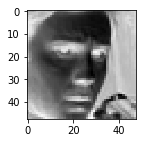

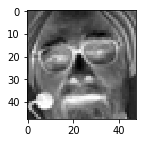

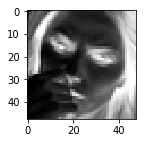

(22000, 48, 48)


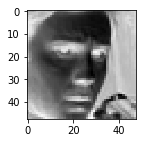

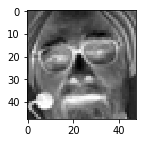

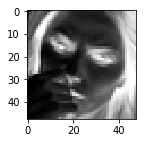

In [13]:
# --------------------- format data ----------------------
import numpy as np
temp = np.array(raw_image).reshape(len(raw_image),48,48).astype(np.int)
for i in range(3):
    plot_image(temp[i])  # print raw image

np.save("trainX", temp)

temp = np.load("trainX.npy")
print(temp.shape)

for i in range(3):
    plot_image(temp[i])  # print reloaded image

temp = np.array(label).reshape(len(label),1).astype(np.int)
print(temp[:10])


np.save("trainY", temp)

temp = np.load("trainY.npy")
print(temp.shape)
print(temp[:10])

# 0: mad, 1:disgust, 2: terrified, 3: happy, 4: sad, 5: suprised, 6: netural

In [107]:
# ---------------- loading format data -----------------

import numpy as np
from keras.utils import np_utils  


trainX = np.load("trainX_split1.npy")
print(type(trainX[0]), trainX.shape)
trainX = trainX/255
print(trainX[0])

trainY = np.load("trainY_split1.npy")
print(type(trainY[0]), trainY.shape)
print(trainY[:5])

trainX = trainX.reshape(trainX.shape[0], 48, 48, 1).astype('float32') 

trainY_oneHot = np_utils.to_categorical(trainY)  
print(trainY_oneHot.shape)

def get_class_weights(y):
    uni_val, counter = np.unique(y, return_counts=True)
    print(uni_val)
    print(counter)

    return  [float(10000/count) for count in counter]

class_weights=get_class_weights(trainY)
print(class_weights)

<class 'numpy.ndarray'> (17600, 48, 48)
[[9.22722030e-05 1.07650903e-04 1.07650903e-04 ... 2.46059208e-04
  2.15301807e-04 1.99923106e-04]
 [7.68935025e-05 1.07650903e-04 1.07650903e-04 ... 3.38331411e-04
  2.15301807e-04 1.38408304e-04]
 [9.22722030e-05 6.15148020e-05 2.15301807e-04 ... 5.07497116e-04
  1.23029604e-04 1.84544406e-04]
 ...
 [0.00000000e+00 6.45905421e-04 1.96847366e-03 ... 1.23029604e-04
  1.07650903e-04 9.22722030e-05]
 [1.73779316e-03 3.10649750e-03 3.53710111e-03 ... 1.23029604e-04
  1.07650903e-04 9.22722030e-05]
 [3.49096501e-03 3.53710111e-03 3.50634371e-03 ... 1.69165705e-04
  1.07650903e-04 9.22722030e-05]]
<class 'numpy.ndarray'> (17600, 1)
[[1]
 [6]
 [5]
 [4]
 [2]]
(17600, 7)
[0 1 2 3 4 5 6]
[2450  284 2550 4423 2954 1901 3038]
[4.081632653061225, 35.2112676056338, 3.9215686274509802, 2.2609088853719195, 3.3852403520649967, 5.260389268805891, 3.291639236339697]


In [2]:
# ------------------------shuffle dataset--------------------------

import numpy as np
def union_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


trainX, trainY = union_shuffled_copies(trainX, trainY)
print(trainY[:5])
trainY_oneHot = np_utils.to_categorical(trainY)  

NameError: name 'trainX' is not defined

In [22]:
# -----------------------stratified sampling --------------------------

from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[10, 2], [30, 4], [10, 20], [3, 40], [30, 40], [1, 20], [300, 4], [3, 400], [100, 2], [300, 40], 
              [31, 4], [11, 2], [3, 41], [31, 41], [1, 21], [311, 4], [3, 411], [11, 21], [311, 41], [31, 411]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

def stratified_sampling(data, label, valid_percent=0.2):
    spliter = StratifiedShuffleSplit(n_splits=int(1/valid_percent), test_size=valid_percent, train_size=1-valid_percent, random_state=0)
    train_index_set, valid_index_set = [], []
    for train_index, valid_index in spliter.split(data, label):
        print("TRAIN:", train_index, len(train_index), "TEST:", valid_index, len(valid_index))
        train_index_set.append(train_index)
        valid_index_set.append(valid_index)
    return train_index_set, valid_index_set

t_ind, v_ind = stratified_sampling(trainX, trainY, valid_percent=0.2)

counter=0
for tt, vv in zip(t_ind, v_ind):
    counter+=1
    np.save("trainX_split{}".format(counter), trainX[tt])
    np.save("validX_split{}".format(counter), trainX[vv])
    np.save("trainY_split{}".format(counter), trainY[tt])
    np.save("validY_split{}".format(counter), trainY[vv])
    

TRAIN: [ 5667  3986 20006 ... 19371  9666 19362] 17600 TEST: [ 3391 10811  7669 ...  7051  4723  7756] 4400
TRAIN: [ 4707  2570  1397 ... 15023  2004 21316] 17600 TEST: [ 3549 18532  4237 ... 20005  6186  9844] 4400
TRAIN: [12111 21798  7860 ...  2119  9278  1968] 17600 TEST: [19264  1555 15213 ...  7141 18977 14496] 4400
TRAIN: [20830 16239 15366 ... 12882 19215 21811] 17600 TEST: [18250 10376 20387 ...  4351  8704  3816] 4400
TRAIN: [16788 21019  1074 ...  6093  8681  4932] 17600 TEST: [ 8851  7844  4403 ... 10306 10978  2373] 4400


In [102]:
# ------------------------ image data augmentation --------------------------

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(fill_mode='constant', rotation_range=20)
# datagen = ImageDataGenerator(fill_mode='constant', shear_range=20)
# datagen = ImageDataGenerator(fill_mode='constant', zoom_range=0.3)
# datagen = ImageDataGenerator(fill_mode='constant', horizontal_flip=True)
datagen.fit(trainX)
counter=0
trainX_aug = []
trainY_aug = []
generate_amount=len(trainX)

for bx, by in datagen.flow(trainX, trainY, batch_size=1, shuffle=False):
    counter+=1
    if counter>generate_amount: break

    bx=np.squeeze(bx, axis=3)
#     bx=np.squeeze(bx, axis=0)
    trainX_aug.append(bx)
    trainY_aug.append(by)

trainX_aug = np.concatenate(trainX_aug, axis=0).reshape(generate_amount, 48, 48)
print(trainX_aug.shape)
# for t in temp:
#     plot_image(t)
trainY_aug = np.vstack(trainY_aug)
print(trainY_aug.shape, trainY_aug[:5])

np.save("trainX_split_rotate1", trainX_aug)

# trainY_oneHot_aug = np_utils.to_categorical(trainY_aug)      
# print(trainY_oneHot_aug.shape)
# for i in range(5):
#     plot_image(trainX_aug[i].reshape(48, 48), trainY_aug[i])

(17600, 48, 48)
(17600, 1) [[1]
 [6]
 [5]
 [4]
 [2]]


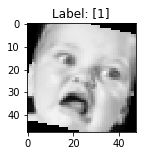

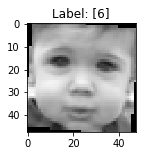

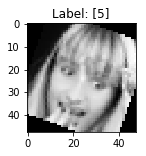

In [112]:

# trainY_oneHot_aug = np_utils.to_categorical(trainY_aug)      
# print(trainY_oneHot_aug.shape)
trainX_aug=np.load("trainX_split_rotate1.npy")
for i in range(3):
    plot_image(trainX_aug[i].reshape(48, 48), trainY[i])
    
trainX_aug = trainX_aug.reshape(trainX_aug.shape[0], 48, 48, 1).astype('float32')     

In [105]:
# ------------------------ plotting function --------------------------

%matplotlib inline

import os  
import matplotlib.pyplot as plt  

def plot_image(image, label=""):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)
    plt.title("Label: {}".format(label))
    plt.imshow(image, cmap='gray')  
    plt.show()  
    
    


KeyboardInterrupt: 

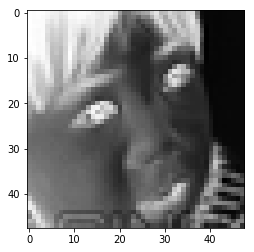

In [11]:
# ------------------------save array to image--------------------------

for ind in range(len(trainX)):
    plt.imshow(trainX[ind], cmap='binary')  
    plt.savefig("./images/sample_{}".format(str(ind)))

In [108]:
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Flatten, Activation 
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization  
from keras import regularizers
    
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=8,  kernel_size=(5,5),  
                 padding='same',  input_shape=(48, 48, 1),
#                  kernel_initializer='he_uniform', bias_initializer='zeros', 
#                  kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(filters=8,  kernel_size=(5,5),  padding='same',
#                 kernel_initializer='he_uniform', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
# Add Dropout layer 1 
model.add(Dropout(0.25))

  
# Create CN layer 2  
model.add(Conv2D(filters=16,  
                kernel_size=(5,5),  
                padding='same',
#                 kernel_initializer='he_uniform', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(filters=16,  
                kernel_size=(5,5),  
                padding='same',
#                 kernel_initializer='he_uniform', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
# Add Dropout layer 2 
model.add(Dropout(0.25))

# Create CN layer 3 
model.add(Conv2D(filters=32,  
                kernel_size=(5,5),  
                padding='same',
#                 kernel_initializer='he_uniform', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(filters=32,  
                kernel_size=(5,5),  
                padding='same',
#                 kernel_initializer='he_uniform', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
# Create Max-Pool 3  
model.add(MaxPooling2D(pool_size=(2,2)))  
# Add Dropout layer 3
model.add(Dropout(0.25))


model.add(Flatten())  

model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))  

model.add(Dense(7, activation='softmax'))  

model.summary()  
print("")  



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 8)         208       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 8)         32        
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 8)         1608      
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 8)         32        
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 8)         0         
__________

In [ ]:
# ------------------------ model training --------------------------

from keras import optimizers

# adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=10e-8, decay=0.0, amsgrad=False)
# 定義訓練方式  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

# 開始訓練  
train_history = model.fit(x=trainX, y=trainY_oneHot, validation_split=0.2, class_weight=class_weights,
                          epochs=50, batch_size=100, verbose=2)  

Train on 17600 samples, validate on 4400 samples
Epoch 1/50


In [114]:
# ------------------------ augmentation testing--------------------------

from keras import optimizers

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

tempX = np.vstack((trainX, trainX_aug))
tempY_oneHot = np.vstack((trainY_oneHot, trainY_oneHot))
print(tempX.shape, tempY_oneHot.shape)
train_history = model.fit(x=tempX, y=tempY_oneHot, validation_split=0.2, class_weight=class_weights,
                          epochs=50, batch_size=100, verbose=2)

validX= np.load("validX_split1.npy")
validX = validX.reshape(validX.shape[0], 48, 48, 1).astype('float32')     
print(type(trainX[0]), trainX.shape)
# trainX = trainX/255
# print(trainX[0])

validY = np.load("validY_split1.npy")
validY = np_utils.to_categorical(validY)  
print(type(trainY[0]), trainY.shape)
model.evaluate(x=validX, y=validY, batch_size=100, verbose=1)

(35200, 48, 48, 1) (35200, 7)
Train on 28160 samples, validate on 7040 samples
Epoch 1/50


KeyboardInterrupt: 

In [13]:
import h5py
from keras.models import load_model, save_model
model1.save('models/09071448_model.h5')

model1 = load_model('models/09071448_model.h5')

In [14]:

train_history = model1.fit(x=trainX, y=trainY_oneHot, validation_split=0.2, class_weight=class_weights,
                          epochs=20, batch_size=100, verbose=2)  

Train on 17600 samples, validate on 4400 samples
Epoch 1/20
 - 176s - loss: 1.0253 - acc: 0.6079 - val_loss: 1.1136 - val_acc: 0.5866
Epoch 2/20
 - 178s - loss: 1.0205 - acc: 0.6164 - val_loss: 1.1226 - val_acc: 0.5898
Epoch 3/20
 - 165s - loss: 1.0284 - acc: 0.6144 - val_loss: 1.1479 - val_acc: 0.5702
Epoch 4/20
 - 172s - loss: 1.0241 - acc: 0.6103 - val_loss: 1.1362 - val_acc: 0.5720
Epoch 5/20
 - 157s - loss: 1.0105 - acc: 0.6172 - val_loss: 1.1396 - val_acc: 0.5791
Epoch 6/20
 - 158s - loss: 1.0216 - acc: 0.6115 - val_loss: 1.1181 - val_acc: 0.5923
Epoch 7/20
 - 160s - loss: 1.0193 - acc: 0.6165 - val_loss: 1.1303 - val_acc: 0.5827
Epoch 8/20
 - 155s - loss: 1.0074 - acc: 0.6166 - val_loss: 1.1182 - val_acc: 0.5852
Epoch 9/20


KeyboardInterrupt: 